<a href="https://colab.research.google.com/github/KJM94/Single_project/blob/main/KPI_%EB%8F%84%EC%B6%9C_%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4_%EC%A0%84%EB%9E%B5_%EC%95%84%EC%9D%B4%EB%94%94%EC%96%B4_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/baseline_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use("ggplot")
plt.rc('font', family='NanumGothic')

In [ ]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

### Data Load

In [ ]:
customer = pd.read_csv('./customers.csv')
location = pd.read_csv('./locations.csv')
order_items = pd.read_csv('./order_items.csv')
orders = pd.read_csv('./orders.csv')
payments = pd.read_csv('./payments.csv')
product = pd.read_csv('./products.csv')
review = pd.read_csv('./reviews.csv')
seller = pd.read_csv('./sellers.csv')

### Data

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer_id              87955 non-null  object
 1   Customer_unique_id       87955 non-null  object
 2   Customer_zipcode_prefix  87955 non-null  int64 
 3   Customer_city            87955 non-null  object
 4   Customer_state           87955 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Order_id                       87955 non-null  object
 1   Customer_id                    87955 non-null  object
 2   Order_status                   87955 non-null  object
 3   Order_purchase_timestamp       87955 non-null  object
 4   Order_delivered_carrier_date   87955 non-null  object
 5   Order_delivered_customer_date  87955 non-null  object
 6   Order_estimated_delivery_date  87955 non-null  object
dtypes: object(7)
memory usage: 4.7+ MB


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100557 entries, 0 to 100556
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_id       100557 non-null  object 
 1   Order_item_id  100557 non-null  int64  
 2   Product_id     100557 non-null  object 
 3   Seller_id      100557 non-null  object 
 4   Price          100557 non-null  float64
 5   Freight_value  100557 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


### EDA

#### Top10 제품 카테고리 시각화

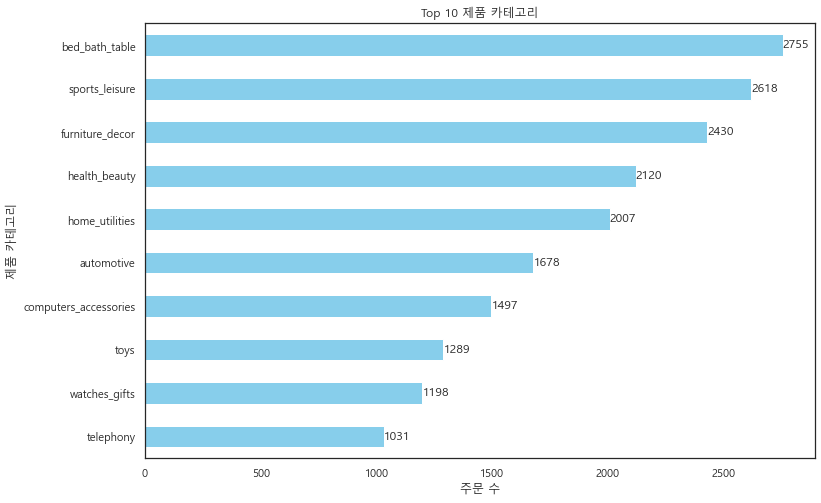

In [ ]:
# 카테고리별 주문 수 계산
category_cnt = product['Product_category_name'].value_counts().head(10)

plt.figure(figsize=(12, 8))
bars = category_cnt.sort_values(ascending=True).plot(kind='barh', color='skyblue')

plt.title('Top 10 제품 카테고리')
plt.xlabel('주문 수')
plt.ylabel('제품 카테고리')

# 각 바 위에 값 표시
for bar in bars.containers[0]:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center')

plt.show()

#### 고객 Top 10 도시 시각화

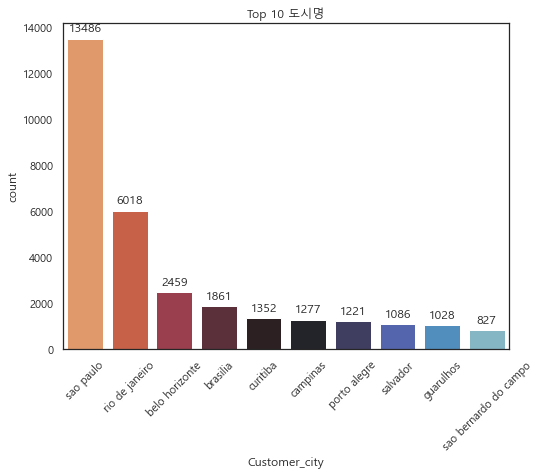

In [ ]:
# 상위 10개 도시 선택
top10_cities = customer['Customer_city'].value_counts().head(10).index

# 상위 10개 도시에 대한 데이터만 필터링
data = customer[customer['Customer_city'].isin(top10_cities)]

# 시각화
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Customer_city', data=data,
                   order=data['Customer_city'].value_counts().index,
                   palette='icefire_r')

plt.title('Top 10 도시명')
plt.xticks(rotation=45) # 도시 이름이 긴 경우를 위해 x축 라벨 회전

# 각 바 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()


#### 지불형태 시각화

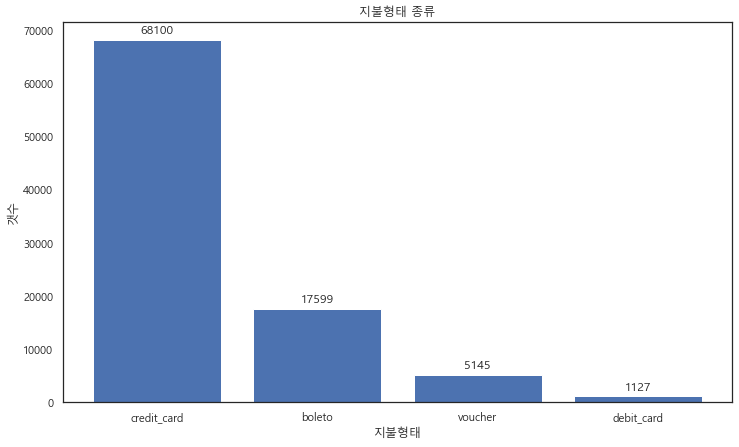

In [ ]:
# 지불 형태별 개수 계산
category_counts = payments['Payment_type'].value_counts()

# 바 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(category_counts.index, category_counts)

# 각 바에 카운트 값 표시
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('지불형태')
ax.set_ylabel('갯수')
ax.set_title('지불형태 종류')

plt.show()

### KPI Definition

#### 월별 매출 시각화

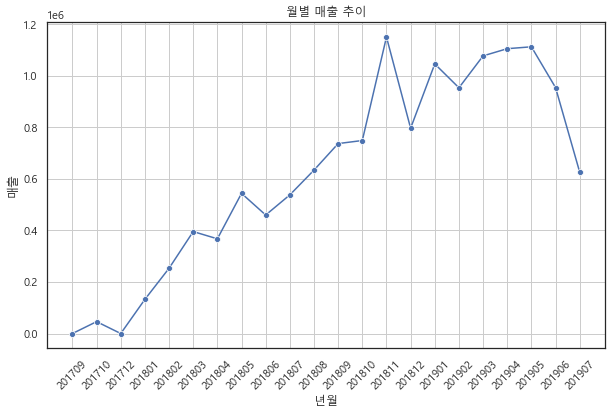

In [ ]:
order = orders.copy()

order['Order_purchase_timestamp'] = pd.to_datetime(order['Order_purchase_timestamp'])
order['YearMonth'] = order['Order_purchase_timestamp'].dt.strftime('%Y%m')

merged_orders = pd.merge(order, order_items, on='Order_id', how='left')
merged_orders['Revenue'] = merged_orders['Price'] * merged_orders['Order_item_id']
monthly_revenue = merged_orders.groupby('YearMonth')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='Revenue', data=monthly_revenue, marker='o')
plt.title('월별 매출 추이')
plt.xlabel('년월')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
orders_customers = pd.merge(order, customer, on='Customer_id', how='inner')
orders_monthly_active = orders_customers.groupby('YearMonth')['Customer_unique_id'].nunique().reset_index()

orders_monthly_active.head()

,YearMonth,Customer_unique_id
0,201709,1
1,201710,263
2,201712,1
3,201801,716
4,201802,1616


#### MAU

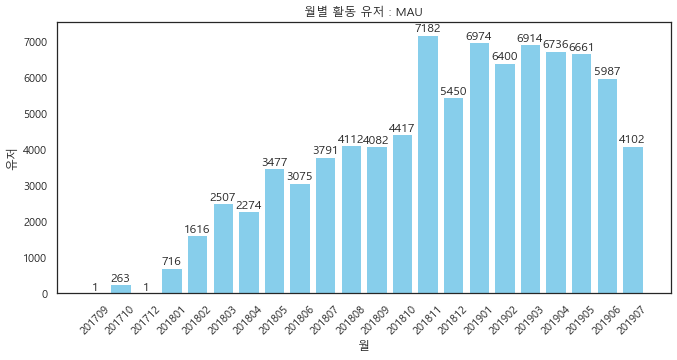

In [ ]:
# 바 차트 그리기
plt.figure(figsize=(11, 5))
bars = plt.bar(orders_monthly_active['YearMonth'], orders_monthly_active['Customer_unique_id'], color='skyblue')

# 타이틀 및 라벨 설정
plt.title('월별 활동 유저 : MAU')
plt.xlabel('월')
plt.ylabel('유저')
plt.xticks(rotation=45)

# 각 바 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.show()

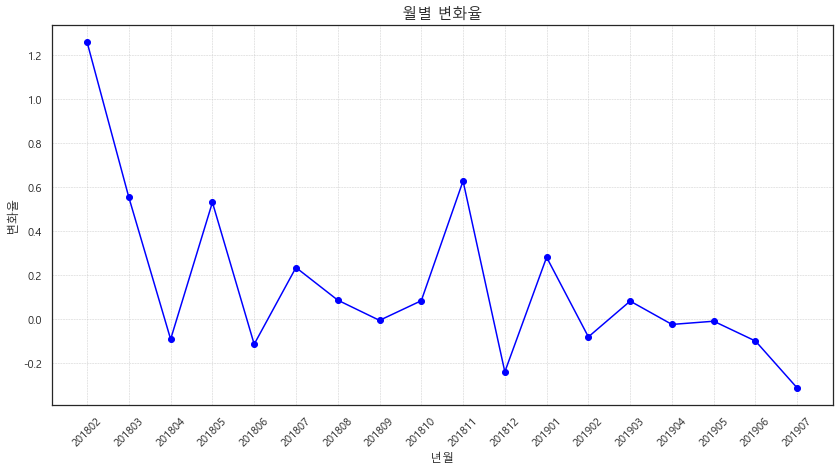

In [ ]:
orders_monthly_active['Monthlychange'] = orders_monthly_active['Customer_unique_id'].pct_change()


filtered_data = orders_monthly_active.query("YearMonth > '201801'")


plt.figure(figsize=(14, 7))
plt.plot(filtered_data['YearMonth'], filtered_data['Monthlychange'], marker='o', linestyle='-', color='blue')
plt.title('월별 변화율', fontsize=15)
plt.xlabel('년월', fontsize=12)
plt.ylabel('변화율', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

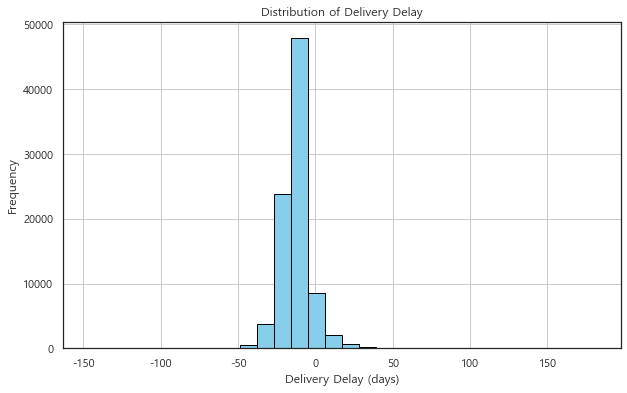

In [ ]:
# 각 주문의 배송 지연을 계산합니다.
orders['Delivery_delay'] = (pd.to_datetime(orders['Order_delivered_customer_date']) - pd.to_datetime(orders['Order_estimated_delivery_date'])).dt.days

# 배송 지연의 분포를 히스토그램으로 시각화합니다.
plt.figure(figsize=(10, 6))
plt.hist(orders['Delivery_delay'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Delivery Delay (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Delay')
plt.grid(True)
plt.show()

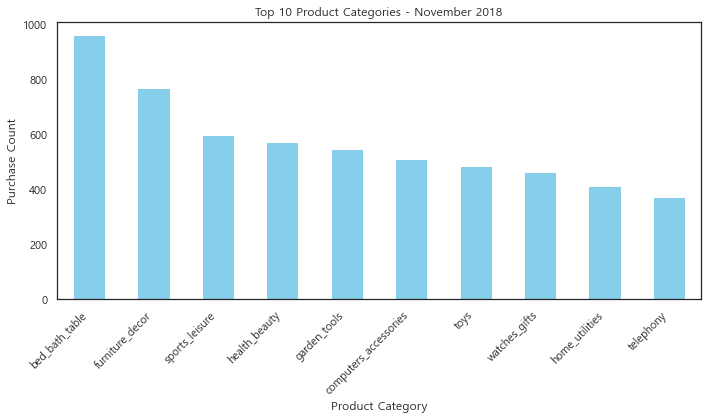

In [ ]:
orders['Order_purchase_timestamp'] = pd.to_datetime(orders['Order_purchase_timestamp'])

# 2018년 11월에 해당하는 데이터만 필터링합니다.
november_orders = orders[(orders['Order_purchase_timestamp'].dt.year == 2018) &
                         (orders['Order_purchase_timestamp'].dt.month == 11)]

# order_items 데이터프레임과 products 데이터프레임을 결합합니다.
merged_data = pd.merge(november_orders, order_items, on='Order_id')
merged_data = pd.merge(merged_data, product, on='Product_id')

# 상위 10개 카테고리의 구매 카운트를 계산합니다.
top_10_categories = merged_data['Product_category_name'].value_counts().head(10)

# 시각화를 위한 막대 그래프를 생성합니다.
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories - November 2018')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()